# L-shaped bracket example

## Load libraries

In [1]:
from EasyBeam import Beam2D
import numpy as np

## Initialize model

In [2]:
LBracket = Beam2D()

## Element types

In [3]:
LBracket.stiffMatType = "Euler-Bernoulli"  # Euler-Bernoulli or Timoshenko-Ehrenfest
LBracket.massMatType = "consistent"        # lumped or consistent

## Element properties

In [4]:
b = 10      # mm
h = 10      # mm
A = b*h      # mm²
I = b*h**3/12    # mm^4
E = 210000        # MPa
rho = 7.85e-9   # t/mm³
LBracket.Properties = [['Prop1', rho, E, A, I, h/2, -h/2]]

## Nodes

In [5]:
LBracket.N = [[   0, 0],
              [ 100, 0],
              [ 100, 100]]

## Connection of nodes to elements

In [6]:
LBracket.El = [[0, 1, 'Prop1'],
               [1, 2, 'Prop1']]

## Boundary conditions and loads

In [7]:
LBracket.Disp = [[0, [0, 0, 0]]]
LBracket.Load = [[1, [100, -100, 0]]]

## Initialize model and mesh

In [8]:
LBracket.Initialize()

/usr/local/lib/python3.8/dist-packages/EasyBeam/EasyBeam.py:98: RuntimeWarning: divide by zero encountered in double_scalars
  self.θ[i] = np.arctan((self.N[self.El[i, 1], 1]-self.N[self.El[i, 0], 1])/(self.N[self.El[i, 1], 0]-self.N[self.El[i, 0], 0]))


## Assignment of dimensions of the cross-sectional geometry and material

In [9]:
b = 10      # mm
h = 10      # mm
LBracket.eU = np.ones([LBracket.nEl, 1])*h/2
LBracket.eL = np.ones([LBracket.nEl, 1])*-h/2
LBracket.A = np.ones([LBracket.nEl, 1])*b*h     # mm^2
LBracket.I = np.ones([LBracket.nEl, 1])*b*h**3/12    # mm^4
LBracket.E = np.ones([LBracket.nEl, 1])*210000        # MPa

## Solve for displacements

In [10]:
LBracket.StaticAnalysis()

## Solve for stresses

In [15]:
LBracket.Scale =10
LBracket.ComputeStress()

## Plot results

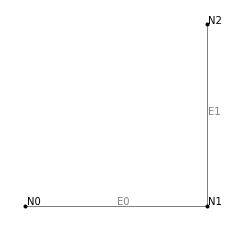

In [16]:
LBracket.PlotMesh(FontMag=2)

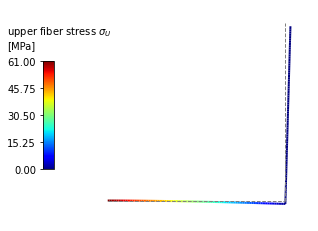

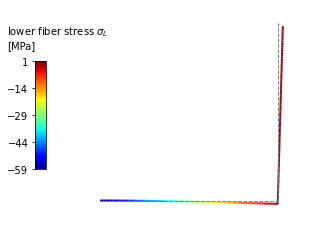

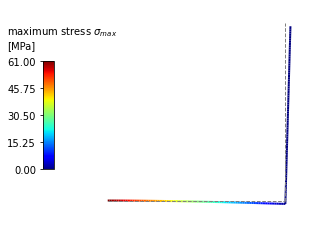

In [17]:
LBracket.PlotStress(stress="all")

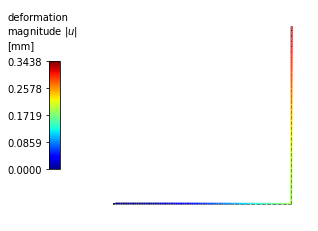

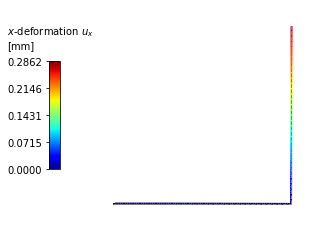

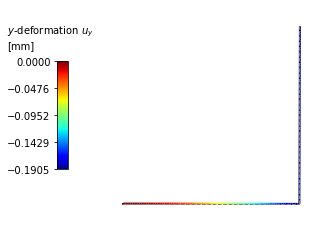

In [14]:
LBracket.PlotDisplacement()